In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\admin\Documents\PYTHON\MCI-Python\L9 - Final Project-20250701T120732Z-1-001\L9 - Final Project\data\transaction_data.csv')

In [3]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.isna().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

# I - DATA CLEANING


1. Hiện trong DataFrame có 2 cột  ***'cust_id'*** và ***'description'*** chứa các giá trị NULL

In [5]:
df.isna().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

Xoá bỏ các bản ghi chứa giá trị 'description' và 'cust_id' NULL

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

**2. Check datatype and correcting column datatype**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   389168 non-null  object 
 1   stock_code    389168 non-null  object 
 2   description   389168 non-null  object 
 3   quantity      389168 non-null  int64  
 4   invoice_date  389168 non-null  object 
 5   unit_price    389168 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       389168 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ MB


In [9]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df['cust_id'] = df['cust_id'].astype('float').astype('int').astype('str')

In [11]:
df['invoice_date']=pd.to_datetime(df['invoice_date'])

In [12]:
df['quantity'] = df['quantity'] .apply(abs)

In [13]:
df['amount'] = df['quantity']*df['unit_price']

**3. Extracting time information**

In [14]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [15]:
df['day'] = df['invoice_date'].dt.day

In [16]:
df['month'] = df['invoice_date'].dt.month

In [17]:
df['hour'] = df['invoice_date'].dt.hour

In [18]:
df['Year_Month'] = df['invoice_date'].dt.strftime('%Y-%m')

In [19]:
df['week_days'] = df['invoice_date'].dt.strftime('%a')

In [20]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,Year_Month,week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed


# III - Exploratory Data Analysis (EDA)

In [21]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,Year_Month,week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. How many monthly active user (MAU) each month?**

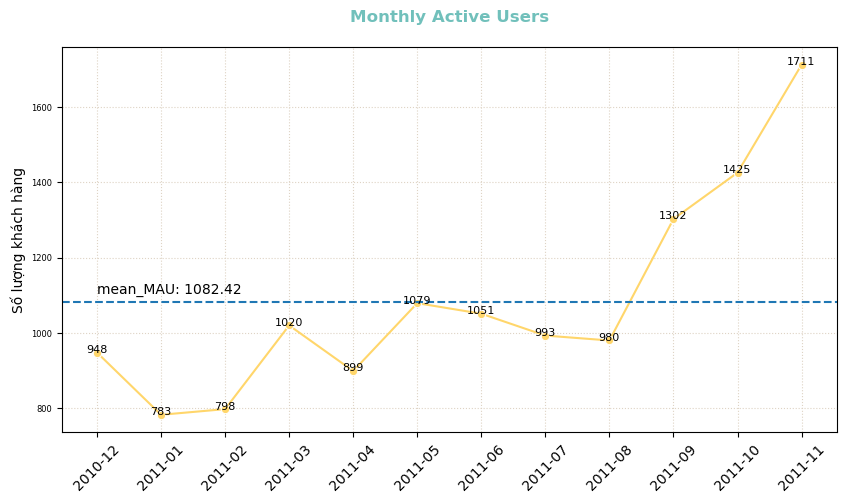

In [36]:
dfplot = df.groupby('Year_Month')['cust_id'].nunique().reset_index()
mean_MAU = dfplot['cust_id'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(
    data = dfplot,
    x = 'Year_Month',
    y = 'cust_id',
    color = "#FFD66B",
    marker = 'o'
)
plt.xticks
plt.xlabel('Year-Month')
plt.ylabel('Số lượng khách hàng')
plt.title('Monthly Active Users\n', weight='bold', color = '#71C0BB')
#plt.tight_layout()
plt.grid (True, ls = ':', color = '#DED3C4')
plt.yticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.axhline(y = mean_MAU,linestyle='--')
plt.text(x=0, y = mean_MAU*1.02, s=f'mean_MAU: {round(mean_MAU, 2)}')

plt.xlabel('')
for r in dfplot.iterrows():
    text_x = r[1]['Year_Month']
    text_y = r[1]['cust_id']
    plt.text(
    x=text_x,
    y=text_y +0.08,
    s=round(text_y,2),
    ha='center',
    fontsize = 8
)
plt.show()

**2. How are the number of orders and total order amount each month?**

In [24]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,Year_Month,week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed


In [25]:
dfplot=df.groupby('Year_Month').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot

,Year_Month,n_order,total_amount
0,2010-12,1708,590823.760
1,2011-01,1236,663815.700
2,2011-02,1202,457728.550
3,2011-03,1619,611036.910
4,2011-04,1384,512352.871
5,2011-05,1849,708938.040
6,2011-06,1707,714414.220
7,2011-07,1593,625943.541
8,2011-08,1544,674319.800
9,2011-09,2078,974236.392


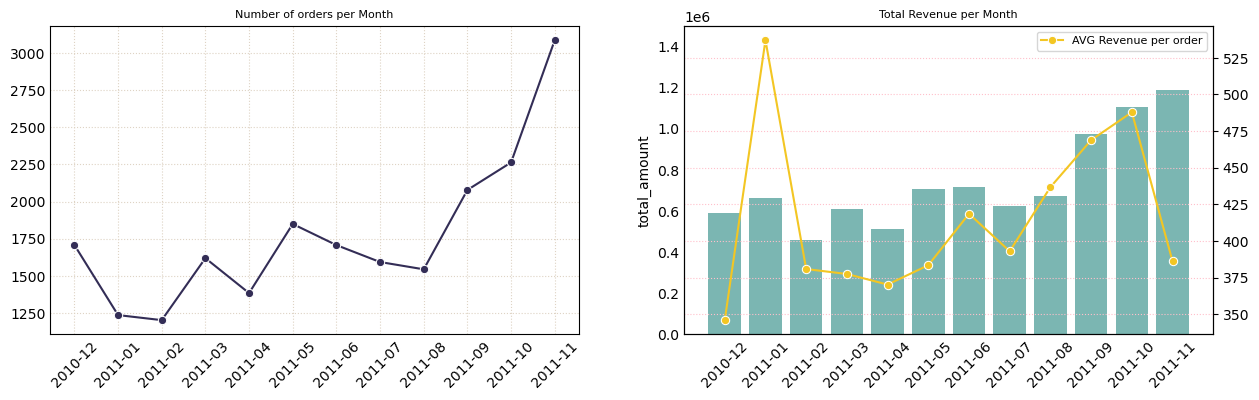

In [26]:
dfplot=df.groupby('Year_Month').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['avg_amount_per_order'] = dfplot['total_amount']/dfplot['n_order']
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(
    data = dfplot,
    x= 'Year_Month',
    y = 'n_order',
    color = '#332D56',
    marker = 'o'
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.grid (True, ls = ':', color = '#DED3C4')
plt.title('Number of orders per Month', fontsize = 8)
plt.tick_params(axis='both', which='both', length=0)

plt.subplot(1,2,2)
sns.barplot(
    data=dfplot,
    x = 'Year_Month',
    y = 'total_amount',
    color='#71C0BB'
)
plt.xticks(rotation = 45)
plt.xlabel('')
#plt.axhline(dfplot['total_amount'].mean(), color = "#67608A")
plt.title('Total Revenue per Month', fontsize = 8)
#plt.axhline(dfplot['total_amount']/dfplot['n_order'])
plt.tick_params(axis='both', which='both', length=0)
plt.ylim(0, 1.5e6)
plt.twinx()

sns.lineplot(
    data = dfplot,
    x = 'Year_Month',
    y = 'avg_amount_per_order',
    color= '#F3C623',
    label='AVG Revenue per order',
    marker = 'o'
)
plt.ylabel('')
plt.legend(fontsize=8) 
plt.grid(True, ls =':', color = 'pink')
plt.show()

**Nhận xét**: 
1) **Số lượng đơn hàng:**
- Là một doanh nghiệp chuyên về quà tặng, công ty có mùa cao điểm vào những tháng cuối năm — thời điểm tập trung nhiều dịp lễ tặng quà như Giáng sinh, Năm mới, đồng thời cũng trùng với các đợt khuyến mãi lớn như Black Friday hay Cyber Monday.
- Bên cạnh đó, do công ty có nhiều khách hàng là các đại lý bán buôn, nên họ thường chủ động đặt hàng từ sớm để chuẩn bị nguồn hàng cho dịp cao điểm, dẫn đến số lượng đơn hàng bắt đầu tăng mạnh từ tháng 9 trở đi.

2) **Doanh thu:**
- Tổng doanh thu không chỉ phụ thuộc vào số lượng đơn hàng, mà còn bị ảnh hưởng bởi giá trị trung bình của mỗi đơn.
Chẳng hạn, dù tháng 1/2011 ghi nhận số đơn hàng rất thấp (chỉ cao hơn tháng 2/2011), nhưng doanh thu không quá thấp — do giá trị trung bình mỗi đơn hàng trong tháng này đạt mức cao nhất trong năm.
- Ngược lại, tháng 11/2011 là tháng có doanh thu cao nhất, song giá trị trung bình trên mỗi đơn hàng lại thấp nhất. Điều này có thể lý giải bởi công ty đã triển khai nhiều chương trình khuyến mại trong giai đoạn này để thúc đẩy doanh số.



3) **Khuyến nghị:**
- Lên kế hoạch nhập hàng và chuẩn bị nguồn lực từ sớm (bắt đầu từ tháng 8–9) để đáp ứng nhu cầu tăng cao trong mùa cao điểm cuối năm. Đặc biệt chú trọng phục vụ nhóm khách hàng là đại lý, vốn có xu hướng đặt hàng sớm để dự trữ.
- Triển khai các chương trình khuyến mãi có chiến lược rõ ràng: Mặc dù các chương trình giảm giá trong tháng 11 giúp thúc đẩy số lượng đơn hàng, nhưng kéo theo đó là giá trị trung bình đơn hàng giảm. Do đó, nên cân nhắc kết hợp các hình thức khuyến mãi thông minh như: giảm giá theo giá trị đơn, tặng kèm quà, mua nhiều giảm sâu... để vừa kích cầu, vừa duy trì doanh thu trên mỗi đơn hàng.
- Tận dụng hiệu quả giai đoạn tháng 1: Đây là thời điểm mà khách hàng có xu hướng mua các đơn hàng giá trị cao dù số lượng đơn giảm. Doanh nghiệp có thể xây dựng các chiến dịch “quà Tết Âm lịch”, “new year reset” hoặc "thank-you gift" dành cho khách VIP, khách hàng trung thành,... nhằm duy trì doanh số ổn định sau mùa cao điểm.


**3. Analyze the number of customers by weekdays and by hour**

In [27]:
cust_per_time = pd.pivot_table(
    data = df,
    index = 'week_days',
    columns = 'hour',
    values='cust_id',
    aggfunc='nunique'
)
cust_per_time=cust_per_time.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
cust_per_time

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
week_days,,,,,,,,,,,,,,,
Mon,NaN,4.0,78.0,225.0,286.0,315.0,407.0,402.0,338.0,293.0,195.0,103.0,10.0,NaN,NaN
Tue,NaN,5.0,107.0,266.0,355.0,375.0,444.0,402.0,331.0,334.0,185.0,130.0,3.0,NaN,NaN
Wed,NaN,4.0,98.0,286.0,363.0,351.0,467.0,414.0,362.0,353.0,256.0,98.0,NaN,1.0,1.0
Thu,21.0,9.0,90.0,263.0,397.0,347.0,459.0,412.0,400.0,373.0,288.0,266.0,188.0,151.0,22.0
Fri,NaN,8.0,112.0,250.0,350.0,307.0,379.0,347.0,297.0,252.0,127.0,84.0,3.0,1.0,1.0
Sun,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,252.0,259.0,89.0,NaN,NaN,NaN,NaN


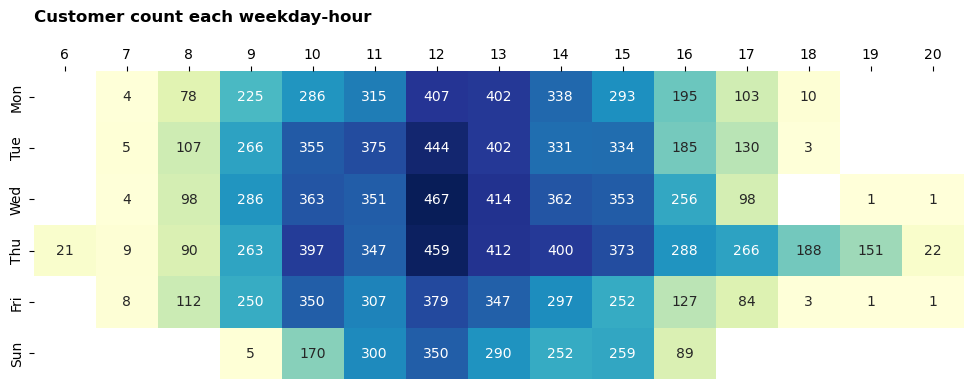

In [28]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    data=cust_per_time, 
    annot=True, 
    cbar=False,
    fmt='.0f',
    cmap = 'YlGnBu'
)
plt.xlabel(''), plt.ylabel('')
ax.xaxis.tick_top()
plt.title('Customer count each weekday-hour\n', loc='left', weight='bold')
plt.show()

In [29]:
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
dfplot4

,hour,amount
0,6,24.088095
1,7,1036.970000
2,8,625.843565
3,9,691.718603
4,10,981.915957
5,11,798.488058
6,12,801.643264
7,13,718.209342
8,14,682.794429
9,15,720.332549


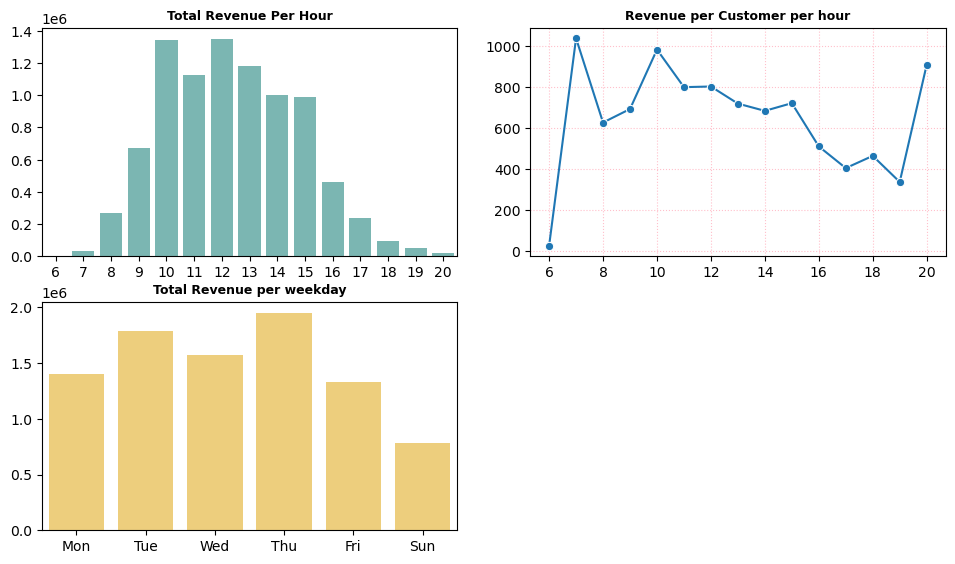

In [37]:
dfplot = df.groupby('week_days')['cust_id'].nunique().reset_index()
dfplot=dfplot.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
dfplot1 = df.groupby('hour')['cust_id'].nunique().reset_index()
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
dfplot2 = df.groupby('hour')['amount'].sum().reset_index()
dfplot3=df.groupby('week_days')['amount'].sum().reset_index()
dfplot3 = dfplot3.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]

plt.figure(figsize=(10,6))
revenuePerHour = df.groupby('hour')['amount'].sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(
    data=revenuePerHour,
    x='hour',
    y='amount',
    color='#71C0BB'
)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Revenue Per Hour', fontsize = 9, weight = 'bold')
#plt.ylim(0,3000)

plt.subplot(2,2,2)
dfplot4= df.groupby(['hour', 'cust_id'])['amount'].sum().reset_index()
dfplot4 = dfplot4.groupby('hour')['amount'].mean().reset_index()
sns.lineplot(
    data= dfplot4,
    x='hour',
    y='amount',
    marker = 'o'
)
plt.title('Revenue per Customer per hour', fontsize = 9, weight = 'bold')
plt.grid(True, ls=':', color = 'pink')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
revenuePerDay=df.groupby('week_days')['amount'].sum().reset_index()
revenuePerDay = revenuePerDay.set_index('week_days').loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
sns.barplot(
    data=revenuePerDay,
    x='week_days',
    y= 'amount',
    color= "#FFD66B",
)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Revenue per weekday', fontsize = 9, weight = 'bold')

plt.tight_layout(pad=2)
plt.subplots_adjust(hspace=0.2)


**Nhận xét**: 

**1) Thói quen mua sắm:**

**Theo khung giờ trong ngày:**
- Khách hàng hoạt động mạnh nhất từ 10h đến 15h, cao điểm rơi vào 12h trưa – thời gian nghỉ trưa của dân văn phòng hoặc người làm việc tự do.

- Về doanh thu, các khung giờ từ 10h–13h cũng đồng thời mang lại tổng doanh thu cao nhất nhờ lượng khách đông và giá trị chi tiêu ổn định.

- Đáng chú ý: Khung giờ 7h sáng và 20h tối có giá trị trung bình trên mỗi khách rất cao, nhưng số lượng khách lại rất thấp (chỉ ~24–30 người/giờ). Điều này cho thấy:
Có thể là khách sỉ, khách trung thành hoặc một vài đơn hàng đặc biệt lớn khiến trung bình bị đẩy lên (outlier).

**Theo ngày trong tuần:**
- Khách hàng có xu hướng mua sắm nhiều hơn vào các ngày giữa tuần (đặc biệt là Thứ 4 & Thứ 5), giảm vào cuối tuần. Có thể vì ở công ty thì còn nhiều thời gian “chết” để lướt web mua sắm, chứ cuối tuần về nhà là bận... chơi hoặc ngủ =))

**2) Khuyến nghị:**
- Tập trung livestream bán hàng trong khung giờ 11h30–13h30 và các ngày giữa tuần, khi khách hàng có xu hướng mua sắm cao nhất.
- Gửi email/thông báo đẩy trước giờ trưa (9h30–10h) để khách kịp xem và phản hồi trong giờ nghỉ.
- Triển khai mini campaign “Flash sale giờ trưa” hoặc "Deal vàng 7h sáng/20h tối" để tạo thói quen truy cập thường xuyên vào 1 khung giờ cố định trong ngày
- Tối ưu chi phí quảng cáo bằng cách phân bổ ngân sách theo khung giờ hiệu quả như: ưu tiên khung giờ 10h–14h các ngày Thứ 3 đến Thứ 5, hạn chế chi tiêu vào buổi tối muộn và cuối tuần.

**4. Top 10 Contries bring most sales for the company**

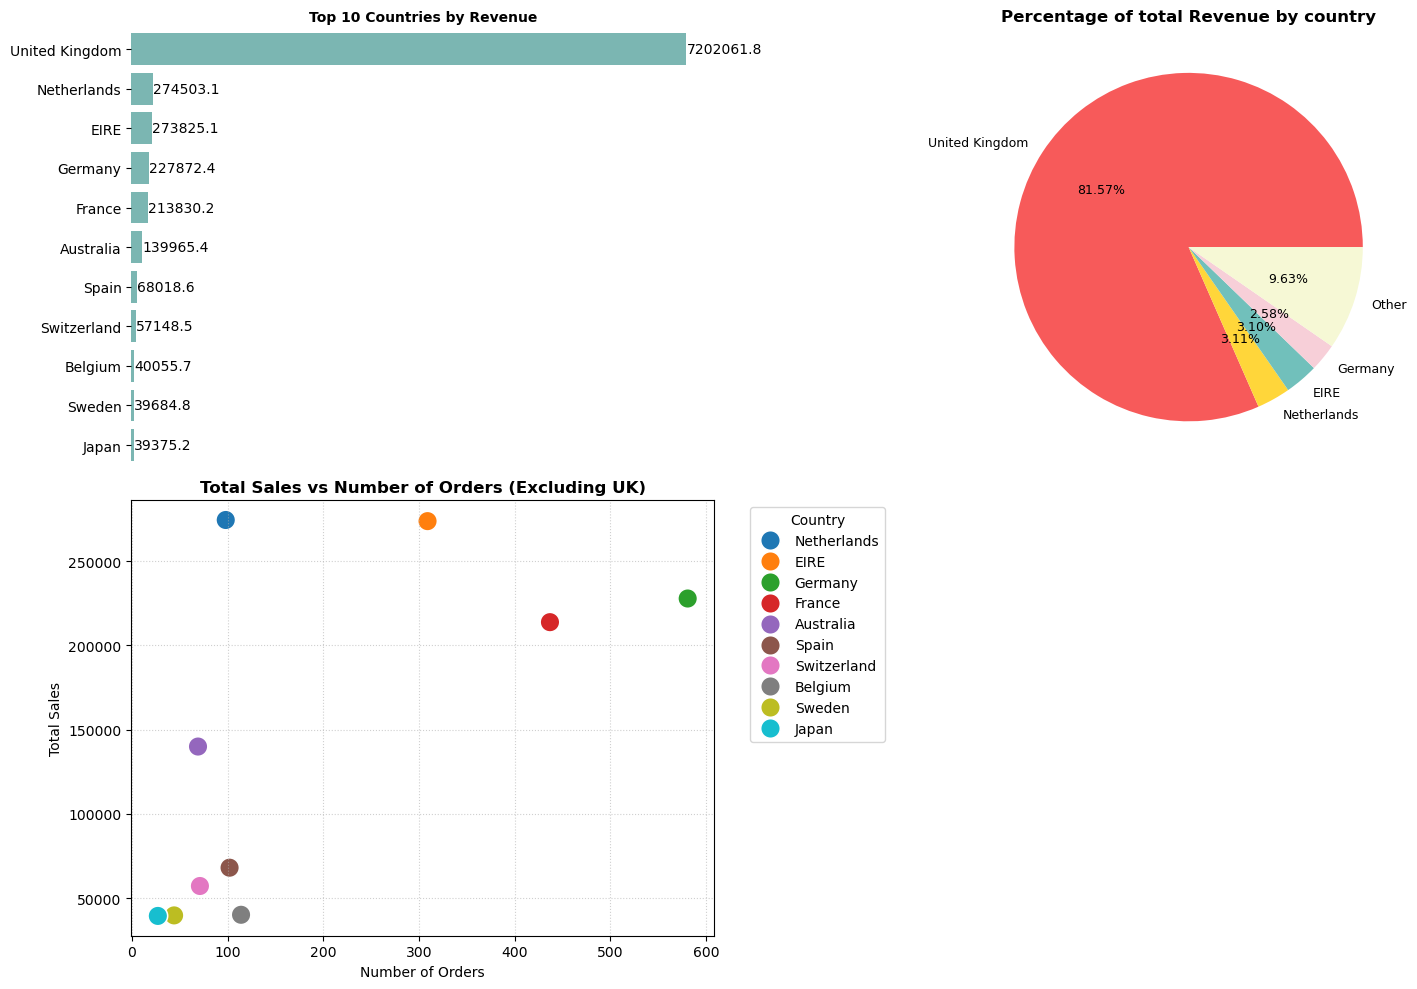

In [38]:
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index().sort_values(by='total_amount', ascending=False).head(11)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax = sns.barplot(
    data = dfplot,
    x = 'total_amount',
    y = 'country',
    color='#71C0BB'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Countries by Revenue', fontsize =10, weight= 'bold')
plt.xticks([])
ax.set_frame_on(False)

plt.subplot(2,2,2)
dfplot1 = df.groupby('country')['amount'].sum().sort_values(ascending=False).reset_index()
top4 = dfplot1[:4]
others = dfplot1.loc[4:,'amount'].sum()
dfplot2 = pd.concat([top4, pd.DataFrame({'country': ['Other'], 'amount':[others]})], ignore_index=True)
plt.pie(
    x=dfplot2['amount'],
    labels = dfplot2['country'],
    autopct='%.2f%%',
    colors=['#F75A5A','#FFD63A','#71C0BB', '#F7CFD8', '#F6F8D5'],
    textprops={'fontsize': 9}
)
plt.title('Percentage of total Revenue by country', weight= 'bold')

plt.subplot(2,2,3)
dfplot3 = dfplot[dfplot['country'] != 'United Kingdom']
sns.scatterplot(
    data = dfplot3,
    x='n_order',
    y = 'total_amount',
    hue= 'country',
    palette='tab10',
    s=200
)
plt.title('Total Sales vs Number of Orders (Excluding UK)', fontsize=12, weight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Total Sales')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()

plt.show()


**Nhận xét:**

**1) Thị trường chủ lực:**
- Biểu đồ tròn cho thấy Vương quốc Anh (UK) chiếm tới 81,57% tổng doanh thu, bỏ xa các quốc gia còn lại. Điều này cho thấy công ty hiện phụ thuộc rất lớn vào thị trường trong nước.
- Bên cạnh đó, ngoài Nhật Bản, 9/10 quốc gia top doanh thu đều là các nước châu Âu → hiện công ty chưa đa dạng hóa thị trường về mặt địa lý.

**2) Thị trường "chịu chi':**

Dù không có số đơn hàng trong Top 3, nhưng một số quốc gia như:
- Netherlands (Hà Lan), Ireland (EIRE) vẫn đạt doanh thu cao trong Top 3
- Australia chỉ đứng thứ 8 về số lượng đơn nhưng lại đứng thứ 6 về tổng doanh thu.

👉 Điều này cho thấy đây là những thị trường có giá trị đơn hàng trung bình cao – khách hàng có khả năng chi tiêu tốt.

**Khuyến nghị:**

**1) Giảm phụ thuộc vào UK:**

Rủi ro cao nếu chính sách, hành vi tiêu dùng tại UK thay đổi.

Cần tìm kiếm và phát triển thị trường mới tại châu Á, châu Mỹ, ...

**2) Tối ưu nhóm khách hàng giá trị cao:**

Tập trung vào các thị trường như Netherlands, EIRE, Australia – nơi mỗi khách hàng mang lại giá trị cao, có thể triển khai:

- Chương trình thành viên theo cấp bậc

- Ưu đãi chi tiêu lớn

- Upsell/cross-sell dựa trên hành vi

**3) Mở rộng thị phần ở châu lục khác:**

Nhật Bản có thể là bàn đạp vào thị trường châu Á.

Nghiên cứu thói quen tiêu dùng và điều chỉnh sản phẩm/dịch vụ phù hợp từng vùng.


**5. Countries with most AOV - Average Order Value:**

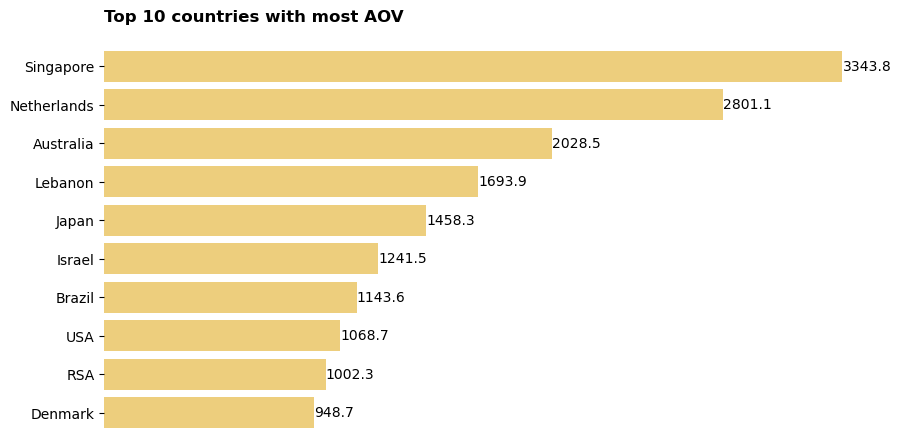

In [62]:
plt.figure(figsize=(10,5))
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['AOV'] = dfplot['total_amount']/dfplot['n_order']
top10_AOV = dfplot.sort_values(by='AOV', ascending=False).head(10)
ax = sns.barplot(
    data= top10_AOV,
    x='AOV',
    y= 'country',
    color = '#FFD66B'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('Top 10 countries with most AOV\n', loc='left', weight='bold')
plt.xlabel('')
plt.show()

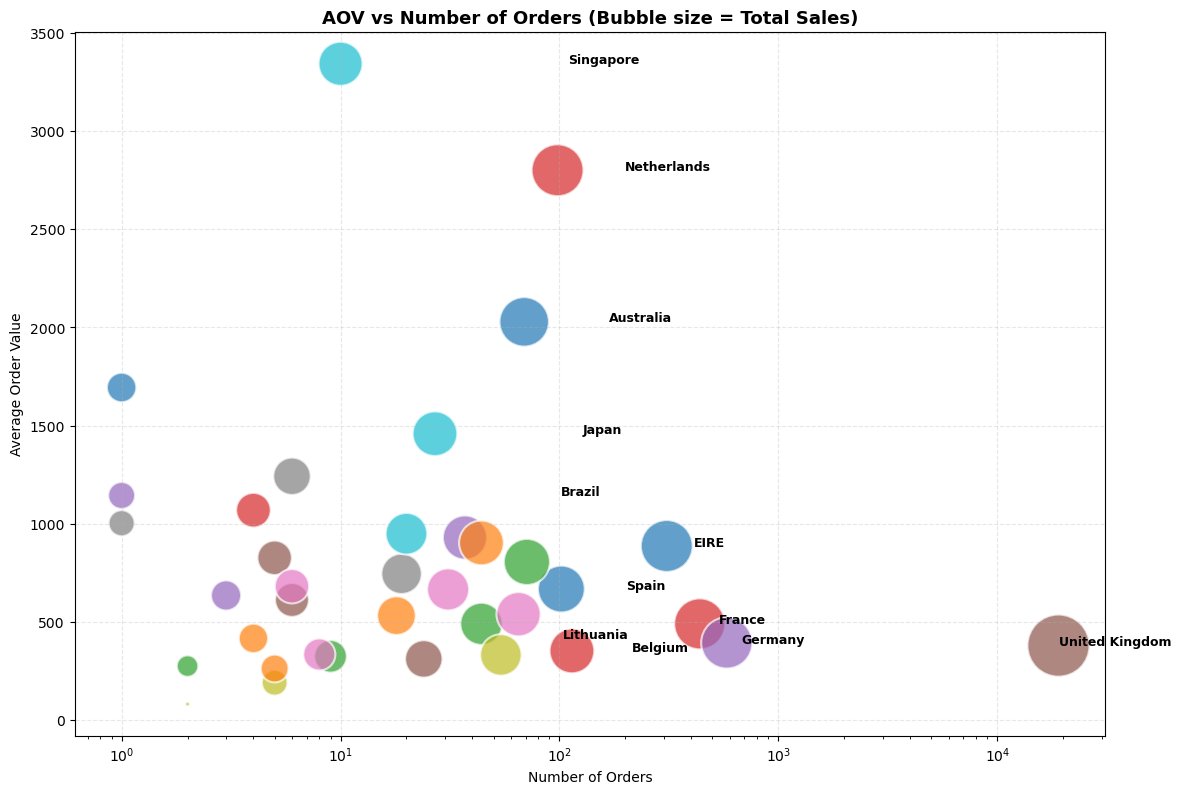

In [41]:
dfplot = df.groupby('country').agg(
    n_order =('invoice_num', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()
dfplot['AOV'] = dfplot['total_amount']/dfplot['n_order']
top10_AOV = dfplot.sort_values(by='AOV', ascending=False).reset_index(drop=True).head(10)

import numpy as np

dfplot['log_amount'] = np.log(dfplot['total_amount'])

plt.figure(figsize=(12,8))

sns.scatterplot(
    data=dfplot,
    x='n_order',
    y='AOV',
    size='log_amount',
    hue='country',
    sizes=(10, 2000),
    alpha=0.7,
    palette='tab10',
    legend=False
)
highlight = ['United Kingdom','Australia', 'Germany', 'France','EIRE','Spain','Singapore', 'Netherlands', 'Japan', 'Ireland', 'Belgium','Brazil','Lithuania']

for i in range(len(dfplot)):
    country = dfplot.loc[i, 'country']
    if country in highlight:
        plt.text(
            dfplot.loc[i, 'n_order'] + 100,  # dịch sang phải cho khỏi đè
            dfplot.loc[i, 'AOV'],
            country,
            fontsize=9,
            weight='bold'
        )
plt.title('AOV vs Number of Orders (Bubble size = Total Sales)', fontsize=13, weight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Average Order Value')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.xscale('log')
plt.show()

In [42]:
dfplot = df.groupby(['country','description'])['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

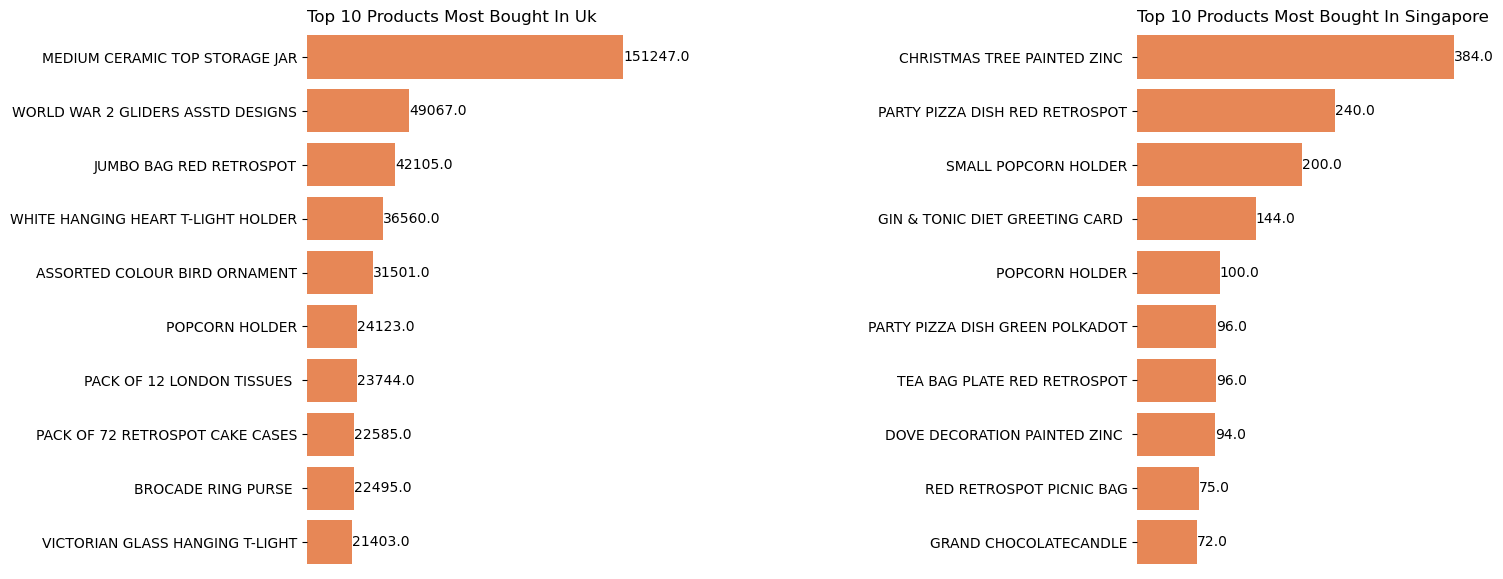

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(121)
# Plot top products for UK:
dfplot_uk = dfplot[dfplot['country'] == 'United Kingdom'].head(10)

ax = sns.barplot(
    data = dfplot_uk,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in UK'.title(), loc='left')
plt.xlabel('')         

plt.subplot(122)
# Plot top products for Singapore:
dfplot_sing = dfplot[dfplot['country'] == 'Singapore'].head(10)

ax = sns.barplot(
    data = dfplot_sing,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in Singapore'.title(), loc='left')
plt.xlabel('')
plt.subplots_adjust(wspace=1.5)
plt.show()

**Nhận xét:**
- WOW!: Nhiều quốc gia có doanh thu cao nhất lại không nằm trong Top 10 quốc gia có AOV (giá trị trung bình mỗi đơn hàng) cao nhất. Đặc biệt, United Kingdom – thị trường lớn nhất về doanh thu và số lượng đơn – lại xếp gần cuối bảng về AOV, cho thấy khách hàng ở đây có xu hướng mua đơn hàng nhỏ, nhưng mua rất nhiều.

- Ngược lại, những thị trường như Singapore, Japan, Netherlands, Australia nổi bật với AOV cao, dù số lượng đơn và tổng doanh thu không thuộc nhóm dẫn đầu. Điều này cho thấy khách hàng ở các thị trường này có xu hướng chi tiêu lớn cho mỗi đơn hàng, thể hiện tiềm năng cao nếu được khai thác đúng cách.

- Một giả thuyết hợp lý là: các thị trường như UK đã có tệp khách hàng trung thành, nên họ nhận được nhiều ưu đãi/khuyến mãi, Do đó, họ thường áp dụng các mã giảm giá, voucher, hoặc chương trình tích điểm, khiến giá trị trung bình mỗi đơn hàng (AOV) giảm xuống, mặc dù tổng số đơn hàng rất lớn.
- Bên cạnh đó, chúng ta có thể thấy được những sản phẩm được săn đón nhất ở 2 thị trường United Kingdom và Singapore để xây dựng chiến lược phân bố sản phẩm theo insight từng khu vực hợp lý nhất

**Khuyến nghị:**

**1) Mở rộng sang các thị trường có AOV cao**

Các quốc gia như Singapore, Brazil, Lithuania, Japan tuy có lượng đơn khiêm tốn nhưng lại có khách hàng chịu chi. Đây là những thị trường tiềm năng để mở rộng chiến dịch tiếp thị, cải thiện độ nhận diện thương hiệu và đẩy số đơn.

**2) Tối ưu chiến lược ở thị trường lớn**

Với các thị trường như UK, France, Germany — nơi có lượng đơn hàng lớn nhưng AOV thấp — có thể:

Tăng giá trị mỗi đơn hàng bằng cách tung ưu đãi theo ngưỡng chi tiêu (VD: đơn trên 1 triệu được tặng voucher hoặc freeship).

Upsell / Cross-sell: gợi ý sản phẩm đi kèm, combo, hoặc gói thành bộ.

**3) Tùy biến chiến lược theo hành vi từng quốc gia**

Sự chênh lệch giữa lượng đơn và AOV cho thấy không nên áp dụng một chiến lược bán hàng chung cho tất cả thị trường. Nên:

Phân khúc khách hàng theo từng quốc gia

Tối ưu nội dung, kênh và ưu đãi phù hợp với hành vi tiêu dùng địa phương.

**6. Number of New vs Returning Customers by Month**

In [44]:
first_order = df.groupby('cust_id').agg(
     first_order = ('invoice_date', 'min')
 ).reset_index()
dfplot = df.merge(first_order, on = 'cust_id', how = 'left')
dfplot.head(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,Year_Month,week_days,first_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,8,2010-12,Wed,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1,12,8,2010-12,Wed,2010-12-01 08:26:00


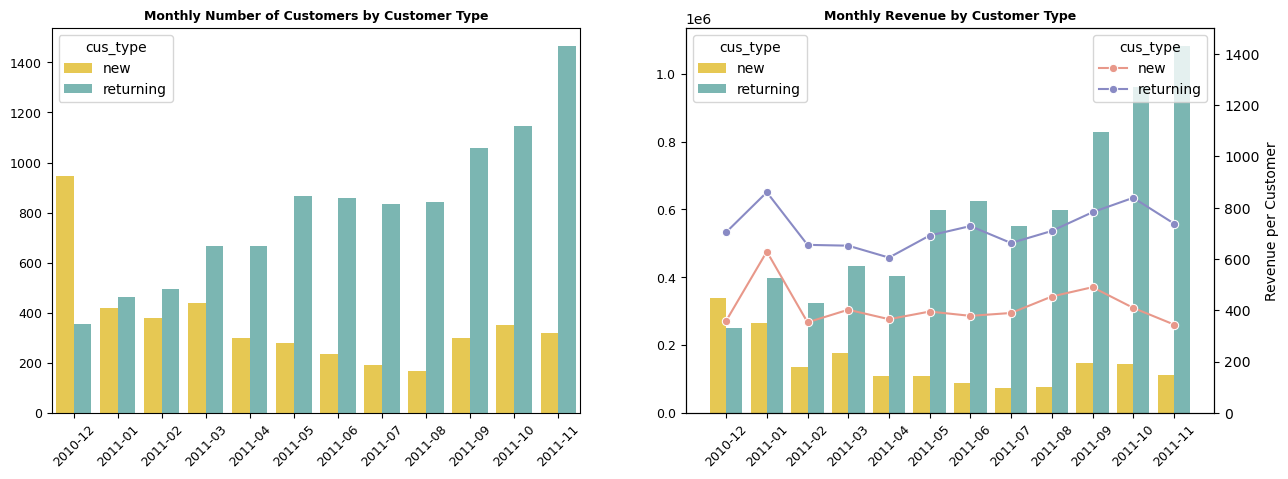

In [45]:
dfplot['cus_type'] = dfplot.apply(
    lambda row: 'new' if row['invoice_date'] == row['first_order'] else 'returning', axis = 1
)
dfplot1 = dfplot.groupby(['Year_Month', 'cus_type']).agg(
    total_customer = ('cust_id', 'nunique'),
    total_amount = ('amount', 'sum')
).reset_index()
dfplot1['Revenue_per_cus'] = dfplot1['total_amount']/dfplot1['total_customer']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(
    data = dfplot1,
    x = 'Year_Month',
    y= 'total_customer',
    hue = 'cus_type',
    palette=['#FFD63A','#71C0BB']
)
plt.xticks(rotation = 45)
plt.title('Monthly Number of Customers by Customer Type', fontsize = 9, weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9)

plt.subplot(1,2,2)
sns.barplot(
    data = dfplot1,
    x = 'Year_Month',
    y = 'total_amount',
    hue = 'cus_type',
    palette=['#FFD63A','#71C0BB']
)
plt.xticks(rotation = 45)
plt.title('Monthly Revenue by Customer Type', fontsize = 9, weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9)
plt.twinx()

sns.lineplot(
    data = dfplot1,
    x = 'Year_Month',
    y = 'Revenue_per_cus',
    hue= 'cus_type',
    palette=['#E8988A', '#898AC4'],
    marker = 'o'
)
plt.ylim(0,1500)
plt.ylabel('Revenue per Customer')
plt.show()

**Nhận xét:**
- Doanh thu và số lượng khách hàng chủ yếu vẫn đến từ khách hàng cũ, cho thấy công ty đã xây dựng được một tệp khách hàng trung thành ổn định, phản ánh sự hài lòng về chất lượng sản phẩm, dịch vụ và giá cả.

- Tháng 1/2011 ghi nhận mức doanh thu trung bình trên mỗi khách hàng cao nhất ở cả hai nhóm (mới và cũ). Đây là thời điểm Tết Dương lịch, khi nhu cầu mua sắm, biếu tặng tăng mạnh – khách hàng thường sẵn sàng chi tiêu nhiều hơn, thể hiện hành vi “chịu chi”.

- Trong giai đoạn từ tháng 5 tới tháng 8, tuy doanh thu trung bình trên mỗi khách hàng mới có xu hướng tăng nhẹ, nhưng tổng doanh thu lại không tăng tương ứng, có thể do số lượng khách hàng mới sụt giảm. Điều này cho thấy có thể công ty chưa triển khai đủ các hoạt động marketing thu hút khách mới trong giai đoạn này.

- Nhìn chung, hành vi chi tiêu giữa khách hàng mới và cũ có xu hướng tương đồng giữa các tháng trong năm, tuy nhiên khách hàng cũ vẫn đóng vai trò chủ đạo về mặt doanh thu.

- Tỷ lệ khách hàng cũ tăng đều và ổn định là một điểm mạnh, thể hiện công ty làm tốt trong việc giữ chân khách hàng, từ đó tạo dòng doanh thu bền vững.

**Khuyến nghị:**
- Cần tăng cường các hoạt động tiếp cận và thu hút khách hàng mới. Với việc tỷ lệ khách hàng cũ đang tăng đều và ổn định, chứng tỏ sản phẩm, dịch vụ và giá cả của công ty có lợi thế cạnh tranh rõ rệt. Vì vậy, nếu mở rộng được tệp khách hàng mới, công ty có thể chuyển đổi họ thành khách hàng trung thành – từ đó đẩy mạnh tăng trưởng doanh thu một cách bền vững.

- Tận dụng dịp lễ Tết (đặc biệt là tháng 1) để triển khai các chương trình combo quà tặng, khuyến mãi giá trị cao hoặc đẩy sản phẩm cao cấp. Đây là thời điểm khách hàng có xu hướng chi tiêu nhiều hơn – cơ hội tốt để tăng AOV và CLV.

- Tiếp tục duy trì và chăm sóc khách hàng cũ bằng các chương trình tri ân, voucher ưu đãi định kỳ, khuyến mãi sinh nhật, hoặc hệ thống tích điểm – nhằm tăng tần suất mua và duy trì độ trung thành.

- Triển khai các chương trình kích thích chuyển đổi lần đầu như “giảm giá cho đơn hàng đầu tiên”, “giới thiệu bạn bè”, hoặc các gói combo dùng thử cho khách mới.

- Theo dõi sát hành vi khách mới và tỉ lệ quay lại (retention) để đánh giá hiệu quả các chiến dịch, từ đó tối ưu hóa chiến lược giữ chân khách hàng trong dài hạn.




**7. Monthly Average Transaction Value of New Customers Acquired in December 2010**

In [46]:
new_cus_dec2010 = dfplot.loc[(dfplot['Year_Month']== '2010-12') & (dfplot['cus_type']== 'new')]['cust_id'].unique().tolist()

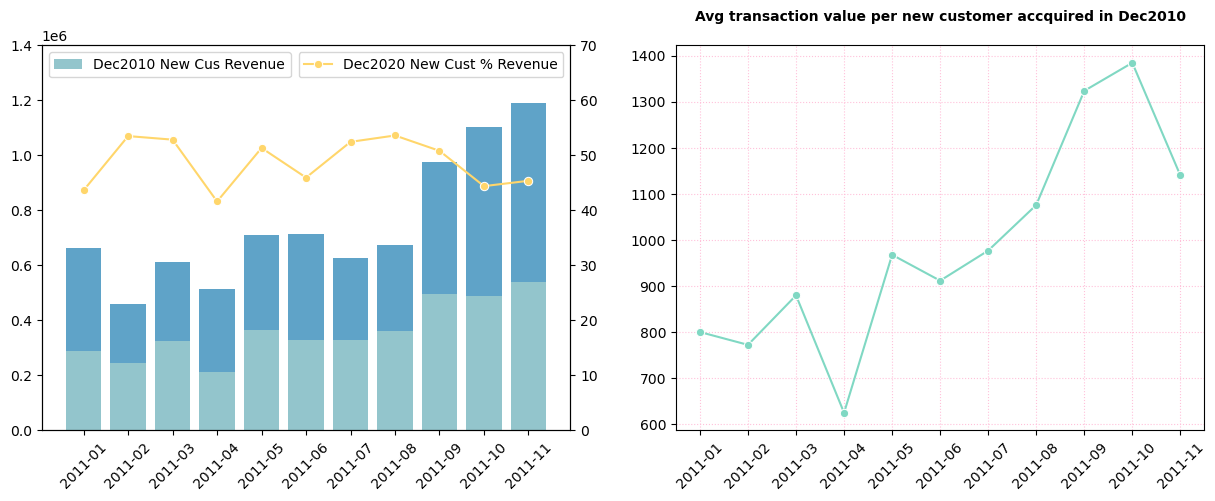

In [47]:
dfplot6 = dfplot.loc[dfplot['cust_id'].isin(new_cus_dec2010)].groupby('Year_Month').agg(
    total_customer = ('cust_id', 'nunique'),
    total_amount = ('amount', 'sum')
).reset_index()
dfplot6['AVG_trans_value'] = dfplot6['total_amount']/dfplot6['total_customer']
df_total = dfplot.groupby('Year_Month')['amount'].sum().reset_index()
dfplot7 = pd.merge(dfplot6, df_total, on ='Year_Month', how = 'left')[1:]
dfplot7['pct'] = round(dfplot7['total_amount']/dfplot7['amount']*100,2)
dfplot7

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(
    data = dfplot7,
    x ='Year_Month',
    y = 'amount',
    color = '#4DA8DA'
)
plt.ylim(0,1.4e6)
sns.barplot(
    data =dfplot7,
    x = 'Year_Month',
    y = 'total_amount',
    label='Dec2010 New Cus Revenue',  
    color = '#8ACCD5'
)
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.twinx()
sns.lineplot(
    data=dfplot7,
    x='Year_Month',
    y='pct',
    marker='o',
    label='Dec2020 New Cust % Revenue',
    color = '#FFD66B'
)
plt.ylim(0,70)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,2,2)
sns.lineplot(
    data = dfplot7,
    x ='Year_Month',
    y ='AVG_trans_value',
    color = '#80D8C3',
    marker = 'o'
)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.grid(True, ls=':', color ='#FFC1DA' )
plt.title('Avg transaction value per new customer accquired in Dec2010\n', fontsize =10, weight ='bold')
plt.show()

**Nhận xét:**

- Nhóm khách hàng mới đầu tiên (Dec 2010) cho thấy mức độ duy trì và tiêu dùng rất tích cực trong suốt năm 2011.

- Tỷ trọng đóng góp vào doanh thu tổng theo tháng của nhóm này luôn ở mức cao (trên 40%), chứng tỏ họ vẫn quay lại mua hàng thường xuyên.

- Doanh thu trung bình trên mỗi khách hàng của nhóm này có xu hướng tăng ổn định, cho thấy không chỉ tần suất mua mà cả giá trị mua hàng cũng gia tăng – đây là dấu hiệu mạnh mẽ của một nhóm khách hàng có tiềm năng trở thành khách trung thành cao.

- Tháng 4/2011 là ngoại lệ với sự sụt giảm nhẹ – cần kiểm tra yếu tố mùa vụ hoặc hoạt động tiếp thị thời điểm đó để rút kinh nghiệm.

- Giai đoạn từ tháng 8 trở đi, nhóm này có dấu hiệu bùng nổ cả về số lượng và mức chi tiêu, cho thấy chiến lược giữ chân (nếu có áp dụng) đang phát huy hiệu quả.

**Khuyến nghị:**

- Phát triển các chương trình Loyalty riêng cho Cohort khách hàng tiềm năng như Dec 2010, bao gồm: *Ưu đãi tăng dần theo số đơn hàng tích lũy, Chăm sóc cá nhân hóa (ưu đãi sinh nhật, khuyến mãi theo hành vi mua), Đẩy mạnh các hình thức “VIP customer”, “Thành viên bạc/vàng”.*

- Phân tích chi tiết hành vi của nhóm Dec 2010 để xác định các yếu tố tác động tới retention cao, từ đó nhân rộng sang các nhóm khách mới.

- Tăng cường tìm kiếm và thu hút khách hàng mới, vì với nền tảng chất lượng sản phẩm – dịch vụ ổn định, công ty đang có lợi thế lớn để chuyển đổi họ thành khách hàng trung thành.

- Tận dụng các thời điểm có mức chi tiêu tăng mạnh (tháng 9–11) để tổ chức chương trình khuyến mãi, kích thích chi tiêu từ khách hàng cũ và mới đồng thời, tận dụng động lực tiêu dùng cao.




**8. Customer Segmentation:**

In [49]:
dfplot['max_date'] = df['invoice_date'].max()
dfplot

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,Year_Month,week_days,first_order,cus_type,last_order,max_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,8,2010-12,Wed,2010-12-01 08:26:00,new,2011-02-10 14:38:00,2011-11-30 17:42:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed,2010-12-01 08:26:00,new,2011-02-10 14:38:00,2011-11-30 17:42:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1,12,8,2010-12,Wed,2010-12-01 08:26:00,new,2011-02-10 14:38:00,2011-11-30 17:42:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed,2010-12-01 08:26:00,new,2011-02-10 14:38:00,2011-11-30 17:42:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,8,2010-12,Wed,2010-12-01 08:26:00,new,2011-02-10 14:38:00,2011-11-30 17:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389163,C579886,22197,POPCORN HOLDER,1,2011-11-30 17:39:00,0.85,15676,United Kingdom,0.85,30,11,17,2011-11,Wed,2011-03-01 10:19:00,returning,2011-11-30 17:39:00,2011-11-30 17:42:00
389164,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,1,2011-11-30 17:39:00,3.29,15676,United Kingdom,3.29,30,11,17,2011-11,Wed,2011-03-01 10:19:00,returning,2011-11-30 17:39:00,2011-11-30 17:42:00
389165,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,1,2011-11-30 17:42:00,1.25,16717,United Kingdom,1.25,30,11,17,2011-11,Wed,2010-12-08 16:48:00,returning,2011-11-30 17:42:00,2011-11-30 17:42:00
389166,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-11-30 17:42:00,7.95,16717,United Kingdom,7.95,30,11,17,2011-11,Wed,2010-12-08 16:48:00,returning,2011-11-30 17:42:00,2011-11-30 17:42:00


In [52]:
dfplot['last_order'] = dfplot.groupby('cust_id')['invoice_date'].transform('max')
dfplot['recency'] = (dfplot['max_date'] - dfplot['last_order']).dt.days
dfplot['frequency'] = dfplot.groupby('cust_id')['invoice_num'].transform('nunique')
def score_recency(recency):
    if recency > 48:
        return 1
    elif 15 <= recency <= 48:
        return 2
    else:  # recency < 15
        return 3

def score_frequency(frequency):
    if frequency == 1:
        return 1
    elif 2 <= frequency <= 5:
        return 2
    else:  # frequency > 5
        return 3
dfplot['recency_score'] = dfplot['recency'].apply(score_recency)
dfplot['frequency_score'] = dfplot['frequency'].apply(score_frequency)

def customer_classify(recency_score, frequency_score):
    if recency_score == 1 and frequency_score == 1:
        return 'Low value'
    elif recency_score == 1 and frequency_score == 2:
        return 'Losing potential loyal'
    elif recency_score == 1 and frequency_score == 3:
        return 'Lost loyal'
    elif recency_score == 2 and frequency_score == 1:
        return 'Low value' 
    elif recency_score == 2 and frequency_score == 2:
        return 'Losing potential loyal'
    elif recency_score == 2 and frequency_score == 3:
        return 'Losing loyal'
    elif recency_score == 3 and frequency_score == 1:
        return 'New customer'
    elif recency_score == 3 and frequency_score == 2:
        return 'Potential loyal'
    elif recency_score == 3 and frequency_score == 3:
        return 'Loyal'
    else:
        return 'Unknown'

dfplot['cus_clasify'] = dfplot.apply(
    lambda row: customer_classify(row['recency_score'], row['frequency_score']),
    axis=1
)



Text(0.5, 1.0, 'Monthly Customer Count by Segment')

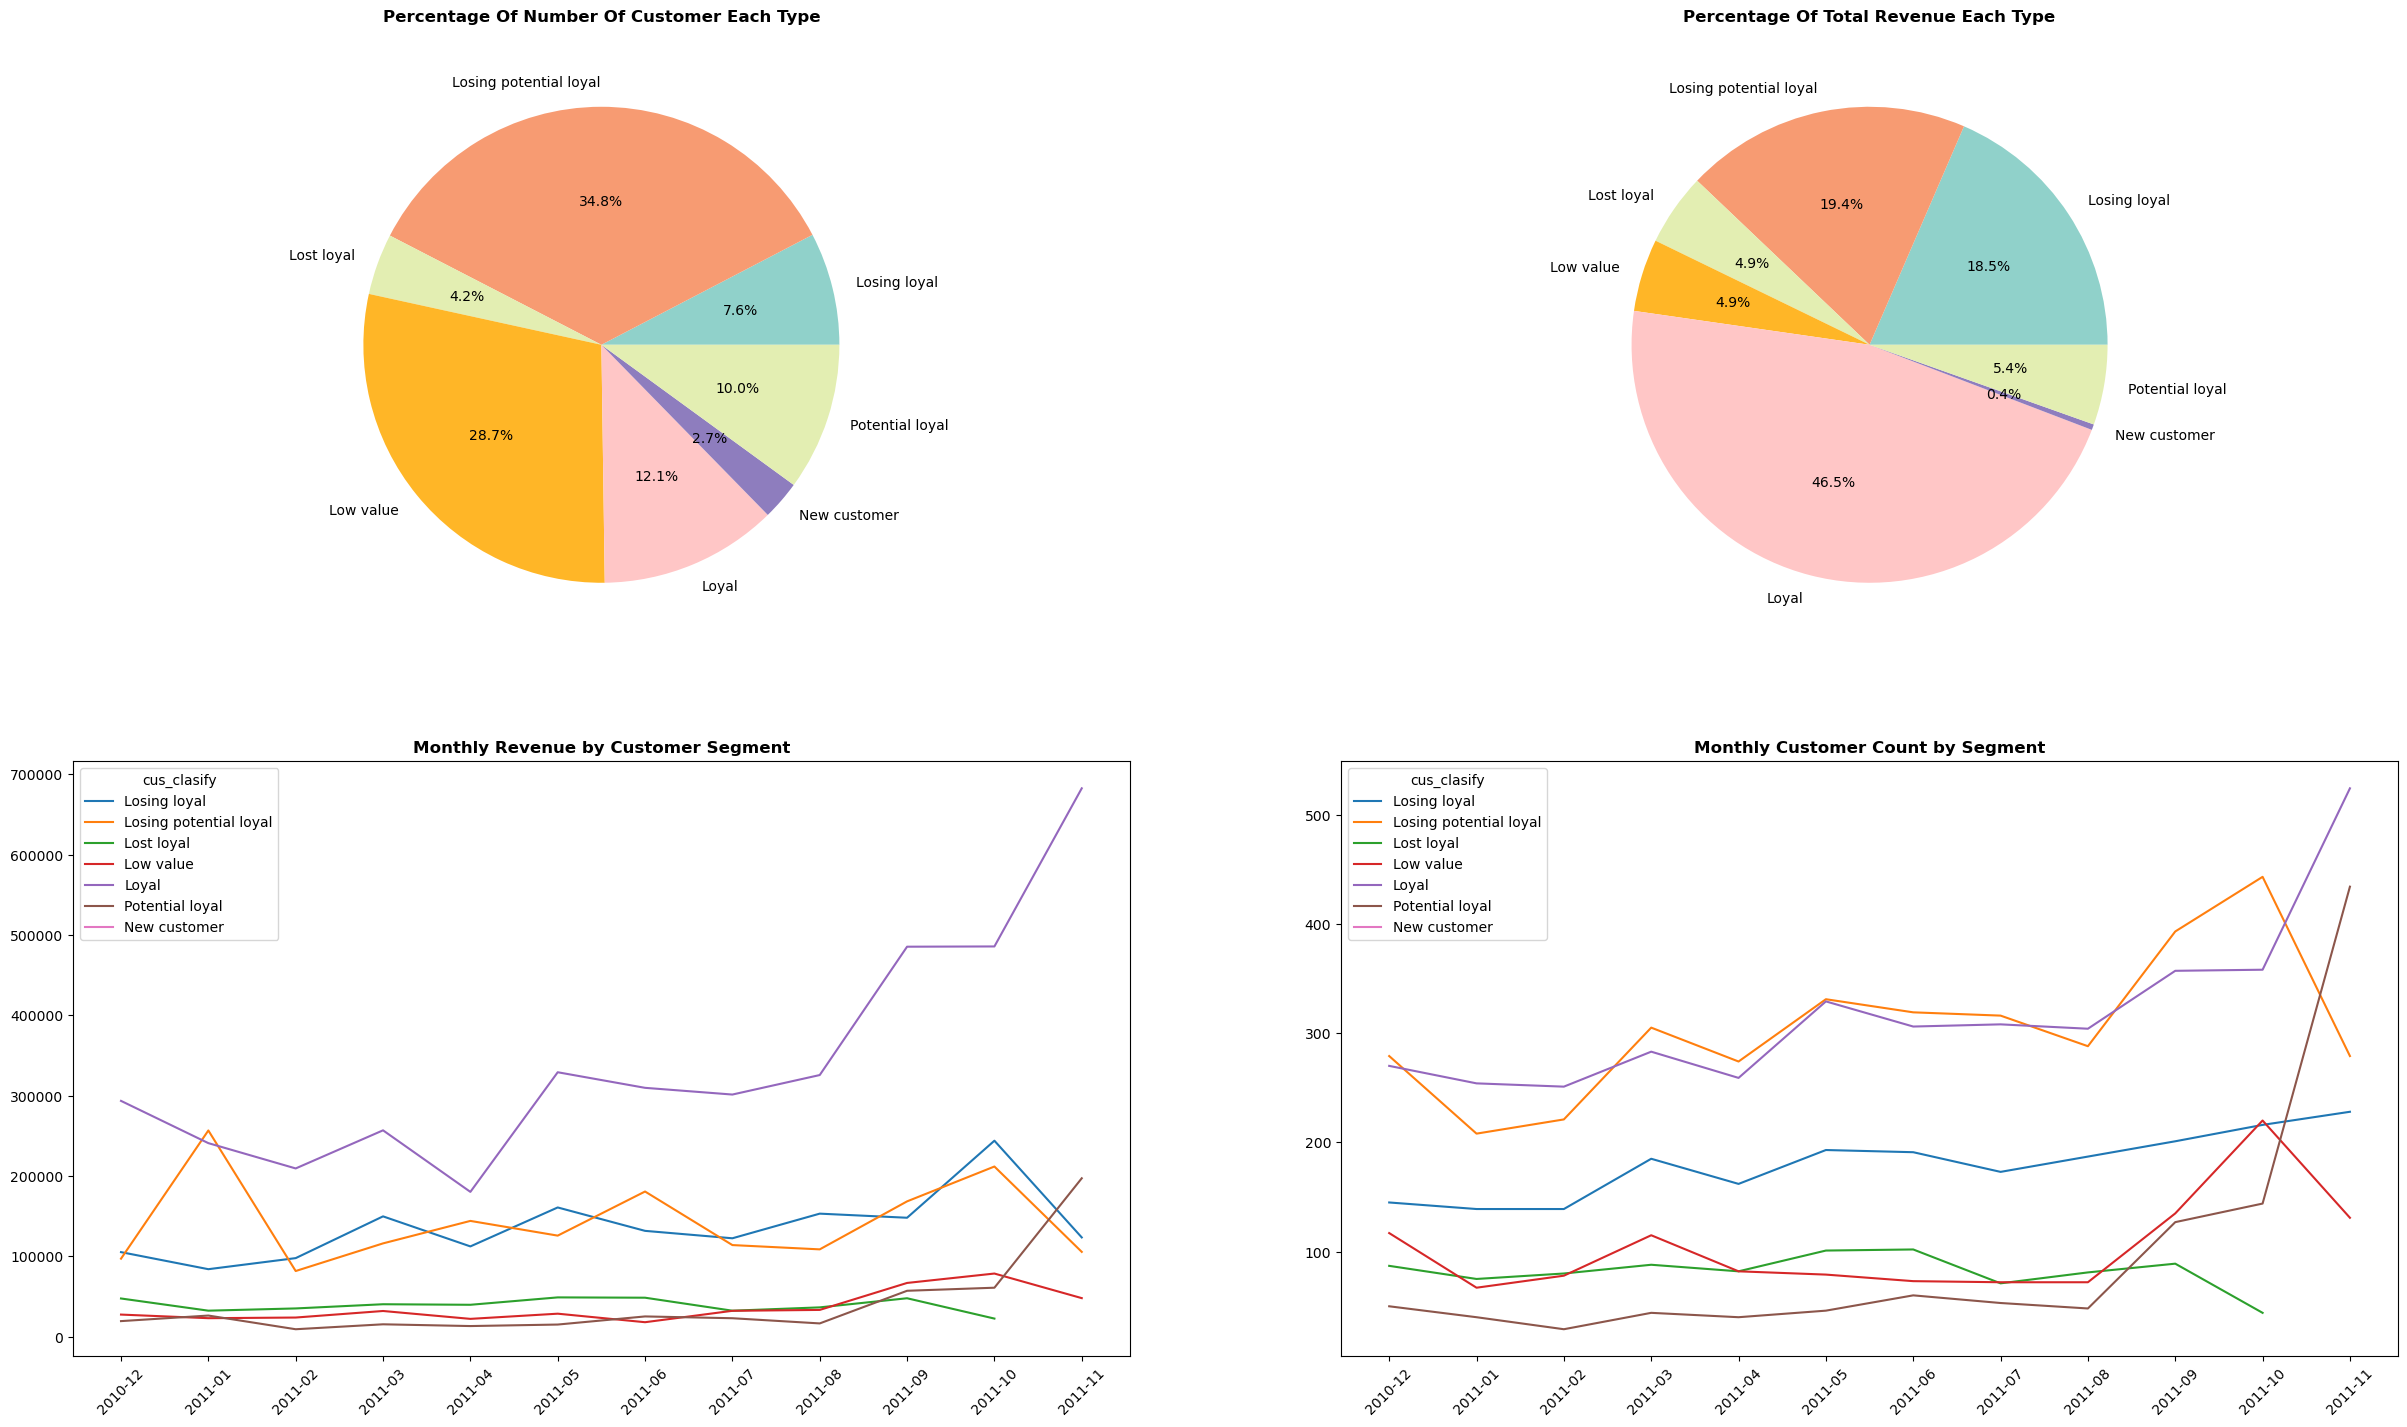

In [61]:
dfplot8 = dfplot.groupby('cus_clasify').agg(
    total_amount = ('amount', 'sum'),
    number_cus=('cust_id', 'nunique')
).reset_index()
dfplot9 = dfplot.groupby(['Year_Month','cus_clasify']).agg(
    total_amount = ('amount', 'sum'),
    number_cus=('cust_id', 'nunique')
).reset_index()

plt.figure(figsize=(30,17))
plt.subplot(2,2,1)
plt.pie(
    x = dfplot8['number_cus'],
    autopct = '%1.1f%%',
    labels = dfplot8['cus_clasify'],
    colors = ["#90D1CA","#F79B72","#E3EEB2","#ffb627","#FFC6C6", "#8E7DBE", "#E3EEB2"]
)
plt.title('Percentage of number of customer each type\n'.title(), fontsize = 12, weight = 'bold')
plt.subplot(2,2,2)
plt.pie(
    x = dfplot8['total_amount'],
    autopct = '%1.1f%%',
    labels = dfplot8['cus_clasify'],
    colors = ["#90D1CA","#F79B72","#E3EEB2","#ffb627","#FFC6C6", "#8E7DBE", "#E3EEB2"]
)
plt.title('Percentage of total revenue each type\n'.title(),fontsize = 12, weight = 'bold')

plt.subplot(2,2,3)
sns.lineplot(
    data=dfplot9,
    x= 'Year_Month',
    y = 'total_amount',
    hue = 'cus_clasify',
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly Revenue by Customer Segment', loc='center', fontsize = 12, weight = 'bold')
plt.subplot(2,2,4)
sns.lineplot(
    data=dfplot9,
    x= 'Year_Month',
    y = 'number_cus',
    hue = 'cus_clasify'
)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly Customer Count by Segment', loc ='center', fontsize = 12, weight = 'bold')

**Nhận xét:**
**1. Tổng quan phân khúc khách hàng**
Doanh thu cao nhất đến từ nhóm Loyal mặc dù số lượng khách của nhóm này không phải nhiều nhất. Điều này cho thấy giá trị trung bình trên mỗi khách hàng (ARPU) ở nhóm Loyal là rất cao.

Lost loyal và Losing loyal là hai nhóm có quy mô khách hàng rất lớn, đặc biệt là nhóm Lost loyal. Đây là một kho khách hàng từng trung thành nhưng đã rời đi – nếu tái kích hoạt được nhóm này, doanh thu có thể tăng mạnh.

Trong khi đó, New customer và Potential loyal có số lượng rất ít, và doanh thu đóng góp gần như không đáng kể → Cho thấy Marketing đang không thu hút được khách hàng mới, hoặc khách hàng mới có chất lượng thấp.

**2. Doanh thu theo thời gian theo từng phân khúc**
Nhóm Loyal tăng trưởng rất tốt cả về doanh thu lẫn xu hướng đều đặn theo tháng. Đây là điểm sáng đáng khích lệ.

Losing loyal cũng đang tăng về doanh thu, nhưng đây lại là tín hiệu đáng báo động, vì khách đang có xu hướng giảm tương tác và rời đi → cần chuyển hóa họ về nhóm Loyal càng sớm càng tốt.

Lost loyal có một số tháng quay lại mua hàng, nhưng sau đó biến mất hoàn toàn từ tháng 11/2011 → Có thể đã “chết hẳn” hoặc bị rơi vào nhóm Low value.

Nhóm New customer gần như không tạo ra doanh thu → Phản ánh Marketing gần như tê liệt.

**3. Số lượng khách hàng theo thời gian**
Số lượng khách Loyal và Potential loyal đang tăng – là dấu hiệu rất tích cực, phản ánh chăm sóc khách hàng hiện tại đang làm tốt.

Lost loyal biến mất hoàn toàn sau tháng 11/2011, như ở biểu đồ trên.

Số lượng khách hàng mới (New customer) rất ít, gần như không thay đổi trong cả năm → cảnh báo nghiêm trọng về việc không mở rộng thị phần mới.

**Bên cạnh đó**, tỷ lệ chuyển đổi từ khách tiềm năng → Loyal đang hoạt động tốt, nhưng lại không có nguồn khách mới để nuôi funnel → funnel đang bị "cạn kiệt đầu vào".

Losing loyal đang tăng → chứng tỏ nội dung/ưu đãi giữ chân khách hàng hiện tại có thể đang xuống cấp hoặc chưa được cá nhân hóa đủ.

Một phần Lost loyal có thể đang rơi vào nhóm Low value thay vì quay về Loyal → cần kiểm tra thêm dữ liệu chi tiết hành vi.

**Khuyến nghị**:
- Tái kích hoạt nhóm Lost loyal và Losing loyal:

Gửi email chăm sóc lại, ưu đãi riêng cho nhóm này.

Phân tích lý do rời bỏ (giá, dịch vụ, không được chăm sóc...).

- Tăng đầu vào khách hàng mới:

Cần đẩy mạnh kênh Marketing online, nội dung hướng tới nhóm khách hàng mới.

Xem xét lại lead generation funnel đang tắc ở đâu.

- Phân bổ ngân sách tập trung vào nhóm tiềm năng nhất (Loyal & Potential loyal):

Ưu đãi theo cấp độ trung thành.

Kết hợp referral để chính khách hàng loyal kéo thêm khách mới.


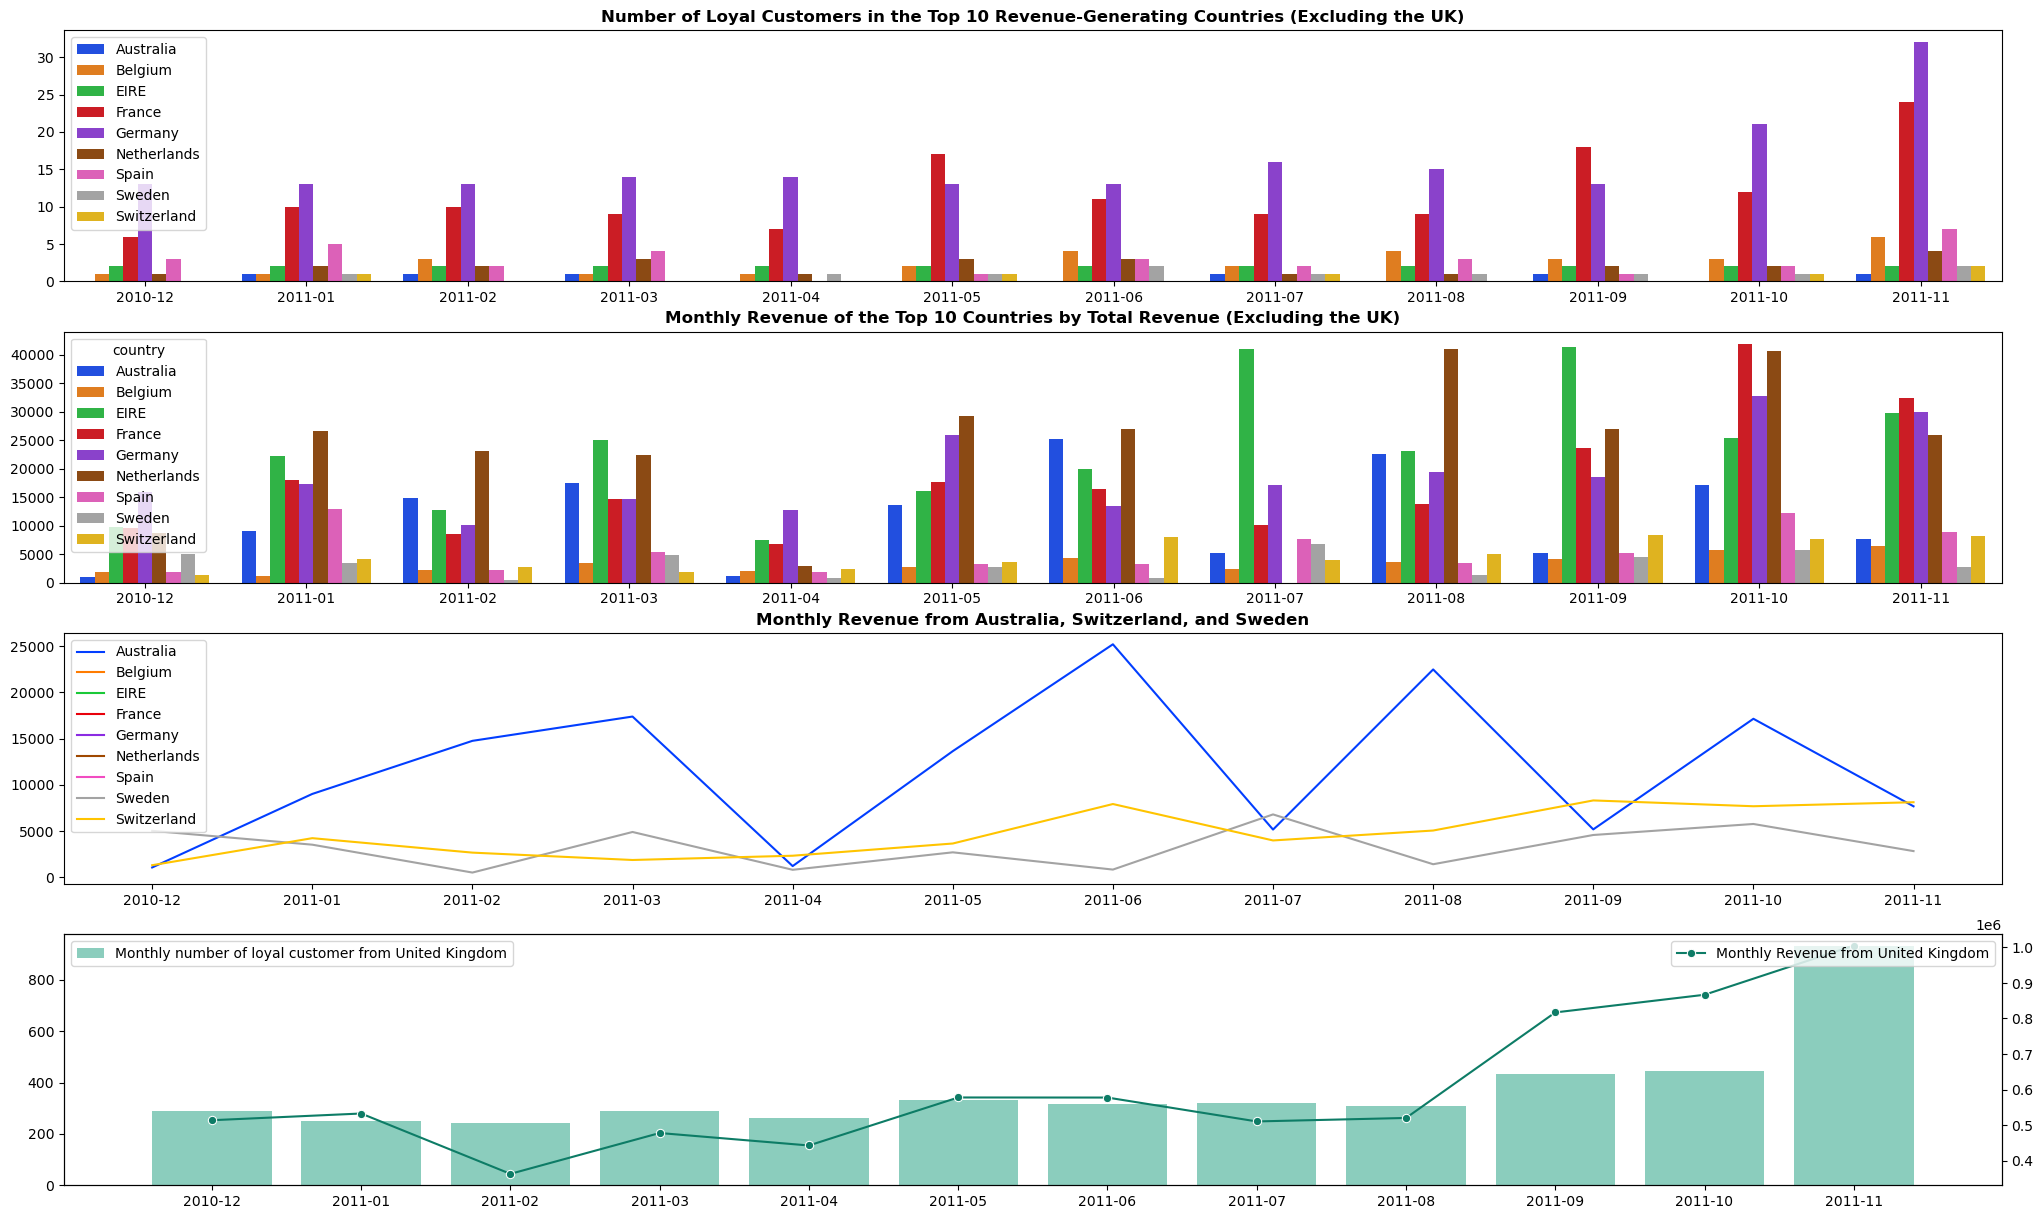

In [ ]:
dfplot10 = dfplot.loc[
    dfplot['country'].isin([
        'Sweden', 'Australia', 'Belgium', 'France', 'Germany','France',
        'Spain','Spain','EIRE','Switzerland', 'Belgium', 'Netherlands'])
    ].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot12 = dfplot.loc[
    dfplot['country'].isin([
        'Sweden', 'Australia','Switzerland'])
    ].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot11 = dfplot.loc[
    (dfplot['cus_clasify'] == 'Loyal') &
    (dfplot['country'].isin([
        'Sweden', 'Australia', 'Belgium', 'France',
        'Germany', 'Spain', 'EIRE', 'Switzerland', 'Netherlands'
    ]))
].groupby(['Year_Month', 'country'])['cust_id'].nunique().reset_index()
dfplot13 = dfplot.loc[
    dfplot['country']== 'United Kingdom'].groupby(['Year_Month', 'country'])['amount'].sum().reset_index()
dfplot14= dfplot.loc[
    (dfplot['cus_clasify'] == 'Loyal') &
    (dfplot['country'] == 'United Kingdom')].groupby('Year_Month')['cust_id'].nunique().reset_index()
# 1. Tạo danh sách các quốc gia duy nhất
countries = sorted(list(set(dfplot10['country'].unique()).union(set(dfplot11['country'].unique()))))

# 2. Tạo một bảng màu cố định cho từng quốc gia
palette = dict(zip(countries, sns.color_palette("tab20", n_colors=len(countries))))

plt.figure(figsize=(25,15))

plt.subplot(4,1,1)
sns.barplot(
    data=dfplot11,
    x= 'Year_Month',
    y = 'cust_id',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Number of Loyal Customers in the Top 10 Revenue-Generating Countries (Excluding the UK)', weight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.legend(loc='upper left')
plt.subplot(4,1,2)
sns.barplot(
    data=dfplot10,
    x= 'Year_Month',
    y = 'amount',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Monthly Revenue of the Top 10 Countries by Total Revenue (Excluding the UK)', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.subplot(4,1,3)
sns.lineplot(
    data=dfplot12,
    x= 'Year_Month',
    y = 'amount',
    hue = 'country',
    palette='bright',
    hue_order=countries
)
plt.title('Monthly Revenue from Australia, Switzerland, and Sweden', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.barplot(
    data= dfplot14,
    x='Year_Month',
    y = 'cust_id',
    color = '#80D8C3',
    label = 'Monthly number of loyal customer from United Kingdom'
)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=2)
plt.twinx()
sns.lineplot(
    data=dfplot13,
    x= 'Year_Month',
    y = 'amount',
    color = '#0D7C66',
    marker = 'o',
    label = 'Monthly Revenue from United Kingdom'
)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=1)

**Nhận xét**:
- Nhìn vào biểu đồ, có thể thấy rằng những quốc gia có lượng khách hàng thuộc nhóm Loyal ổn định như Pháp và Đức thường có doanh thu khá ổn định và đều đặn theo thời gian. Điều này cho thấy mối liên hệ chặt chẽ giữa tỷ lệ khách hàng trung thành và mức doanh thu bền vững.

- Ngược lại, các quốc gia như Úc, Sweden và Switzerland tuy đạt doanh thu tốt trong một số thời điểm, nhưng lại có dấu hiệu giảm nhẹ doanh thu trong những tháng cuối năm — giai đoạn mà hầu hết các quốc gia khác lại ghi nhận mức tăng trưởng. Nguyên nhân có thể là do lượng khách hàng trung thành tại các quốc gia này còn khá hạn chế, khiến cho doanh thu khó duy trì khi không có chiến dịch thúc đẩy cụ thể hoặc lượng khách hàng mới không đủ bù đắp.

**Khuyến nghị:**
- Củng cố và mở rộng tệp khách hàng Loyal tại các thị trường đang suy giảm:

Triển khai các chương trình giữ chân riêng biệt tại Australia, Sweden, Switzerland: ưu đãi gia hạn, combo quay lại, khuyến mãi cá nhân hóa theo hành vi.

Gửi survey cho khách hàng đã mua để xác định nguyên nhân rời đi, từ đó điều chỉnh sản phẩm/dịch vụ phù hợp.

- Xây dựng chiến dịch giữ chân khách hàng phù hợp theo từng khu vực:

Pháp & Đức nên tiếp tục duy trì nhóm khách hàng trung thành thông qua chương trình hội viên, quyền lợi nâng cấp theo cấp độ mua sắm.

Dành ngân sách quảng cáo lại (retargeting) cho nhóm khách từng mua nhưng không quay lại trong 3–6 tháng gần đây tại các thị trường đang sụt giảm.

- Tối ưu các quốc gia có doanh thu tốt nhưng chưa ổn định:

Áp dụng mô hình chăm sóc khách hàng như tại Pháp và Đức cho các nước như Úc, nếu hành vi tiêu dùng tương đồng.

Ưu tiên đo lường và theo dõi chỉ số chuyển đổi từ “khách hàng mới” sang “Loyal” tại từng thị trường để xác định bottleneck.

## **KẾT LUẬN:**
**1. Hiệu suất theo mùa & hành vi tiêu dùng**

- Doanh nghiệp có mùa cao điểm rõ rệt vào cuối năm (từ tháng 9–12) do trùng các dịp lễ và khuyến mại lớn. Lượng đơn hàng tăng mạnh từ tháng 9, đặc biệt nhờ khách sỉ chủ động đặt sớm.

- Doanh thu không luôn tỷ lệ thuận với số đơn hàng: Tháng 1 có ít đơn nhưng AOV cao nhất; tháng 11 nhiều đơn nhất nhưng AOV thấp do khuyến mãi mạnh.

- Khách mua nhiều vào giờ trưa (10h–13h) và giữa tuần (Thứ 4, 5). Một số khung giờ ít người nhưng AOV rất cao (7h sáng, 20h tối) có thể là khách sỉ hoặc VIP.

✅ Khuyến nghị:
Lên kế hoạch nhập hàng từ tháng 8–9.

Tối ưu khung giờ quảng cáo và hoạt động bán hàng trực tiếp (livestream, email, push).

Kết hợp các hình thức khuyến mãi thông minh (mua nhiều giảm sâu, tặng kèm, freeship theo ngưỡng).

**2. Thị trường và địa lý**

- UK chiếm 80%+ doanh thu, tạo ra rủi ro lớn nếu thị trường biến động.

- Các quốc gia như Netherlands, EIRE, Australia có AOV cao, dù không có nhiều đơn.

- Japan, Singapore, Brazil là thị trường mới nổi với khách hàng “chịu chi”.

- France & Germany có tập khách hàng trung thành ổn định, doanh thu đều.

- Australia, Sweden, Switzerland có doanh thu tốt nhưng đang chững lại do thiếu khách loyal.

✅ Khuyến nghị:
- Đa dạng hóa thị trường, mở rộng sang châu Á, châu Mỹ.

- Đầu tư chăm sóc nhóm khách AOV cao bằng loyalty, ưu đãi theo cấp.

- Duy trì retargeting ở Pháp/Đức; áp dụng mô hình chăm sóc sang Úc và các nước tương tự.

- Tùy biến chiến lược tiếp cận từng quốc gia dựa vào hành vi tiêu dùng.

**3. Phân khúc khách hàng (RFM và Cohort)**

- Loyal là nhóm đem lại doanh thu cao nhất dù không đông nhất → ARPU rất cao.

- Losing loyal & Lost loyal có quy mô lớn → cần khẩn cấp tái kích hoạt.

- New & Potential loyal rất ít → Marketing chưa hiệu quả, funnel đầu vào "cạn".

- Nhóm khách hàng mới từ Dec 2010 duy trì tiêu dùng tốt trong cả năm → khả năng chuyển hóa cao.

- Tỷ lệ chuyển đổi từ Potential → Loyal đang hoạt động tốt, nhưng không đủ nguồn đầu vào nuôi funnel.

✅ Khuyến nghị:
- Tái kích hoạt nhóm Lost/Losing loyal bằng chương trình chăm sóc & ưu đãi riêng.

- Tăng tệp khách mới qua các chiến dịch lead gen, referral, combo thử, “giảm cho đơn đầu tiên”.

- Phân bổ ngân sách ưu tiên nhóm Loyal & Potential loyal để tăng doanh thu bền vững.

- Xây dựng loyalty program theo cấp bậc (Silver – Gold – VIP), tích điểm – tặng quà.

**4. KẾT LUẬN CHIẾN LƯỢC**

- Công ty đã có tệp khách trung thành mạnh, là nền tảng vững chắc cho tăng trưởng dài hạn.

- Tuy nhiên, phụ thuộc vào khách cũ và thị trường UK quá nhiều khiến rủi ro cao nếu hành vi tiêu dùng thay đổi.

- Để tăng trưởng bền vững, cần song song mở rộng khách hàng mới, thị trường mới và giữ chân nhóm khách giá trị cao.

- Các phân tích theo thời gian, quốc gia và phân khúc đều cho thấy cần chiến lược cá nhân hóa sâu hơn, theo dõi theo thời gian và phản ứng kịp thời theo hành vi tiêu dùng.